# Charting Fundamentals

## Subplots

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# nrows, ncols, plot num
plt.subplot?

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


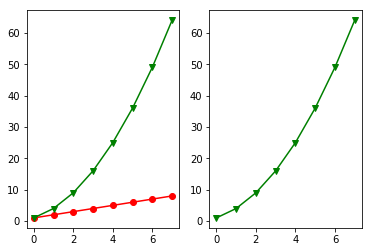

In [7]:
plt.figure()
plt.subplot(1, 2, 1)  # current axis will be subplot 1

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
plt.plot(linear_data, '-ro')

exponent_data = linear_data ** 2
plt.subplot(1, 2, 2) # set current axes to subplot 2

plt.plot(exponent_data, '-gv')

# Put exponent on the linear graph too
plt.subplot(1, 2, 1)
plt.plot(exponent_data,  '-gv')

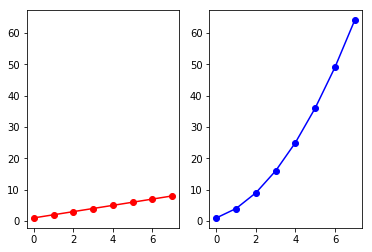

In [8]:
# Share y-axes
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-ro')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponent_data, '-bo')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


True

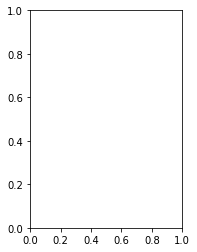

In [9]:
# You can also call subplot with 100 params that correspond to rows, cols, plot num
plt.figure()
plt.subplot(1, 2, 1) == plt.subplot(121)

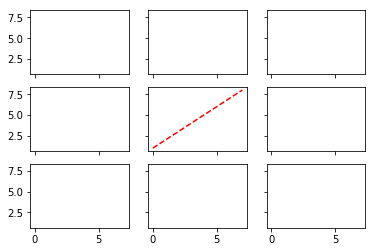

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, 
                                                                        sharex=True,
                                                                        sharey=True)
ax5.plot(linear_data, '--r')
# This will turn off axes except for left and bottom sides

# Must manually iterate over and set visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)
        
plt.gcf().canvas.draw()

## Histograms

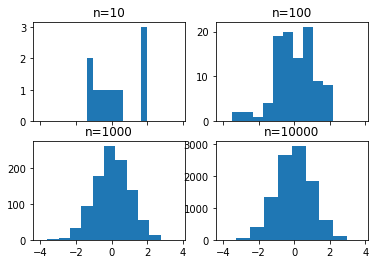

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

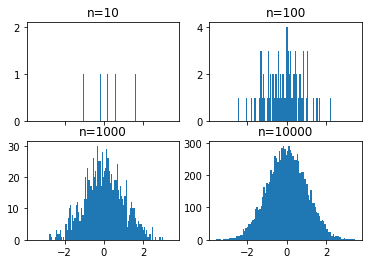

In [12]:
# Same chart, with bins=100 for finer granularity
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

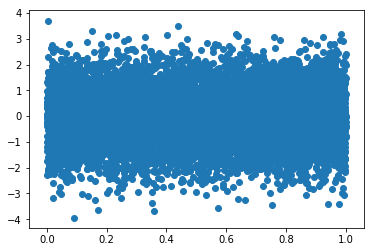

In [13]:
y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x = np.random.random(size=10000)
plt.scatter(x, y)
# Not clear what type of distributions x and y axis are here

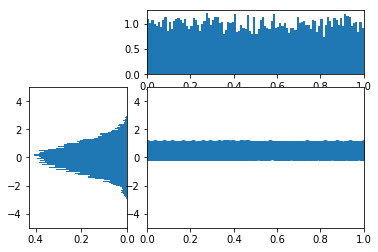

In [14]:
# Use a Grid Spec
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x = np.random.random(size=10000)

lower_right.scatter(y, x)
top_histogram.hist(x, bins=100)
s = side_histogram.hist(y, bins=100, orientation='horizontal')

# Use normed=True to scale frequency data to [0, 1]
top_histogram.clear()
top_histogram.hist(x, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(y, bins=100, orientation='horizontal', normed=True)
side_histogram.invert_xaxis()  # flip axis

# Set axis limits manually
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
    
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

## Boxplots

In [15]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                  'random': random_sample,
                  'gamma': gamma_sample})

In [16]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,2.004468,-0.019743,0.501195
std,1.408835,0.995322,0.289667
min,0.009187,-3.810829,0.000096
25%,0.965377,-0.702302,0.250402
50%,1.684304,-0.020205,0.499834
75%,2.712305,0.672304,0.756428
max,11.817626,4.185210,0.999948


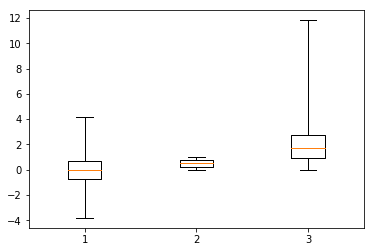

In [18]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')  # use _ = so that jupyter won't print actual arrays of data

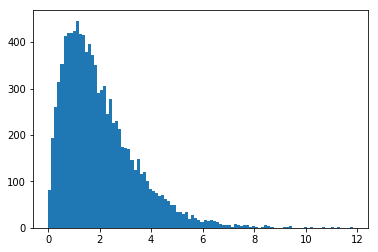

In [19]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

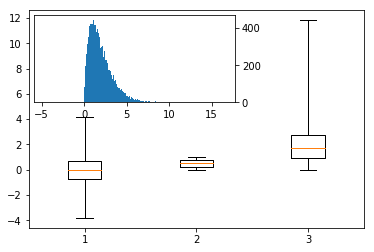

In [22]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')

ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
ax2.yaxis.tick_right()

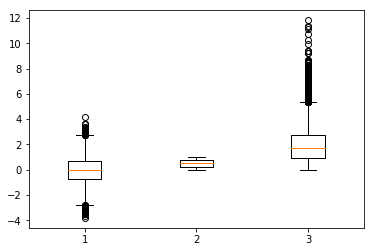

In [25]:
# Without specifying 'whis' argument, whiskers go out to halfway between IQR
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

In [79]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

## Heatmaps

#### 2 Dimensional histogram

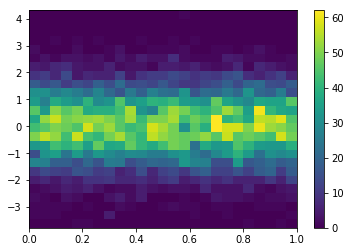

In [32]:
plt.figure()

y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x = np.random.random(size=10000)

_ = plt.hist2d(x, y, bins=25)
plt.colorbar()

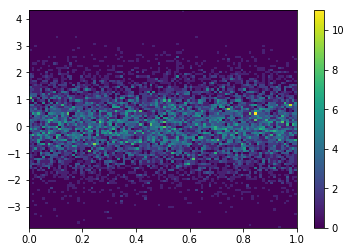

In [33]:
# Increasing bins gives finer granularity, but as you go farther every data point will be one unique color
plt.figure()
_ = plt.hist2d(x, y, bins=100)
plt.colorbar()

## Animation

In [76]:
import matplotlib.animation as animation
%matplotlib notebook

n = 500
x = np.random.randn(n)

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [80]:
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()  # clear current axis
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4, 4, 0, 30 ])
    plt.gca().set_title('Sampling the Normal Distribution', color='w')
    plt.gca().set_ylabel('Frequency', color='w')
    plt.gca().set_xlabel('Value', color='w')
    plt.gca().tick_params(axis='both', colors='white')
    plt.annotate('n={}'.format(curr), [3, 27])

<IPython.core.display.Javascript object>


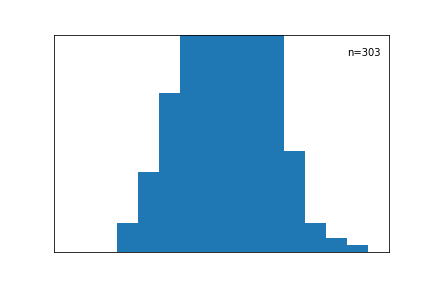

In [81]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=50)

## Interactivity

<IPython.core.display.Javascript object>


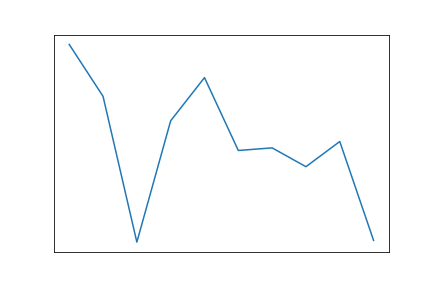

8

In [84]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)
plt.gca().tick_params(axis='both', colors='white')

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {}, {} {}and data {},{}'.format(event.x, event.y, '\n', event.xdata, event.ydata), color='w')

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [71]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']
shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                  'weight': np.random.rand(10),
                  'origin': origins})

df

,height,origin,weight
0,0.398245,USA,0.812645
1,0.716845,Germany,0.325589
2,0.047944,Brazil,0.643228
3,0.560218,Mexico,0.172657
4,0.097583,Chile,0.187524
5,0.956657,India,0.193389
6,0.548614,China,0.470659
7,0.570121,Iraq,0.188192
8,0.322560,Canada,0.521233
9,0.233242,UK,0.391888


<IPython.core.display.Javascript object>


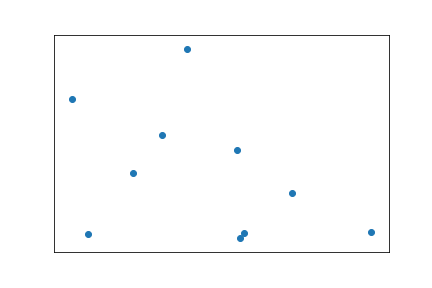

In [85]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight', color='w')
plt.gca().set_xlabel('Height', color='w')
plt.gca().tick_params(axis='both', colors='white')

In [86]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item from {}.'.format(origin), color='w')
    
plt.gcf().canvas.mpl_connect('pick_event', onpick)

8